# Results Analysis

## 1. Setup and Imports

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import os

# --- Setup Project Path ---
# Add the project's root directory to the Python path to allow importing 'src' modules
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# --- Matplotlib Styling ---
# Set a professional theme for all plots
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.sans-serif'] = 'Arial'

## 2. Load All Experiment Results

In [2]:
# --- Define Paths to Result Directories ---
CV_RESULTS_DIR = os.path.join(project_root, 'results_cv')
SPLIT_TEST_DIR = os.path.join(project_root, 'final_results_split_test')
OFFICIAL_TEST_DIR = os.path.join(project_root, 'final_results_official_test')

# --- Load Data from JSON Files ---
# Cross-Validation Results
with open(os.path.join(CV_RESULTS_DIR, 'cv_summary.json'), 'r') as f:
    cv_results = json.load(f)

# Split Test Set Results
with open(os.path.join(SPLIT_TEST_DIR, 'classification_report.json'), 'r') as f:
    split_class_report = json.load(f)
with open(os.path.join(SPLIT_TEST_DIR, 'all_test_results.json'), 'r') as f:
    split_test_results = json.load(f)

# Official Test Set Results
with open(os.path.join(OFFICIAL_TEST_DIR, 'classification_report.json'), 'r') as f:
    official_class_report = json.load(f)

print("All result files have been loaded successfully.")

All result files have been loaded successfully.


## 3. Key Performance Metrics Summary

In [3]:
# --- Extract Key Metrics ---
mean_cv_accuracy = cv_results['mean_accuracy']
std_cv_accuracy = cv_results['std_accuracy']

split_test_accuracy = split_class_report['accuracy'] * 100
split_balanced_accuracy = split_class_report['balanced_accuracy'] * 100

official_test_accuracy = official_class_report['accuracy'] * 100
official_balanced_accuracy = official_class_report['balanced_accuracy'] * 100

performance_metrics = split_test_results['performance']
throughput = performance_metrics['throughput_images_per_sec']
latency = performance_metrics['latency_ms_per_image']
model_size = performance_metrics['model_size_mb']

# --- Print Summary Table ---
print(" --- Model Performance Summary --- ")
print("-" * 55)
print(f"5-Fold Cross-Validation Accuracy : {mean_cv_accuracy:.2f}% ± {std_cv_accuracy:.2f}")
print("-" * 55)
print(f"Split Test Set Accuracy          : {split_test_accuracy:.2f}%")
print(f"Split Test Set Balanced Accuracy : {split_balanced_accuracy:.2f}%")
print("-" * 55)
print(f"Official Test Set Accuracy       : {official_test_accuracy:.2f}%")
print(f"Official Test Set Balanced Accuracy: {official_balanced_accuracy:.2f}%")
print("-" * 55)
print("\n --- Computational Performance --- ")
print("-" * 55)
print(f"Inference Throughput             : {throughput:.0f} images/sec")
print(f"Inference Latency                : {latency:.3f} ms/image")
print(f"Model Size on Disk               : {model_size:.2f} MB")
print("-" * 55)

 --- Model Performance Summary --- 
-------------------------------------------------------
5-Fold Cross-Validation Accuracy : 99.83% ± 0.05
-------------------------------------------------------
Split Test Set Accuracy          : 99.87%
Split Test Set Balanced Accuracy : 99.89%
-------------------------------------------------------
Official Test Set Accuracy       : 94.90%
Official Test Set Balanced Accuracy: 91.70%
-------------------------------------------------------

 --- Computational Performance --- 
-------------------------------------------------------
Inference Throughput             : 1476 images/sec
Inference Latency                : 0.677 ms/image
Model Size on Disk               : 4.47 MB
-------------------------------------------------------


## 4. Robustness to Data Corruptions (Official Test Set)

 --- Robustness Test Results (Official Test Set Accuracy %) --- 


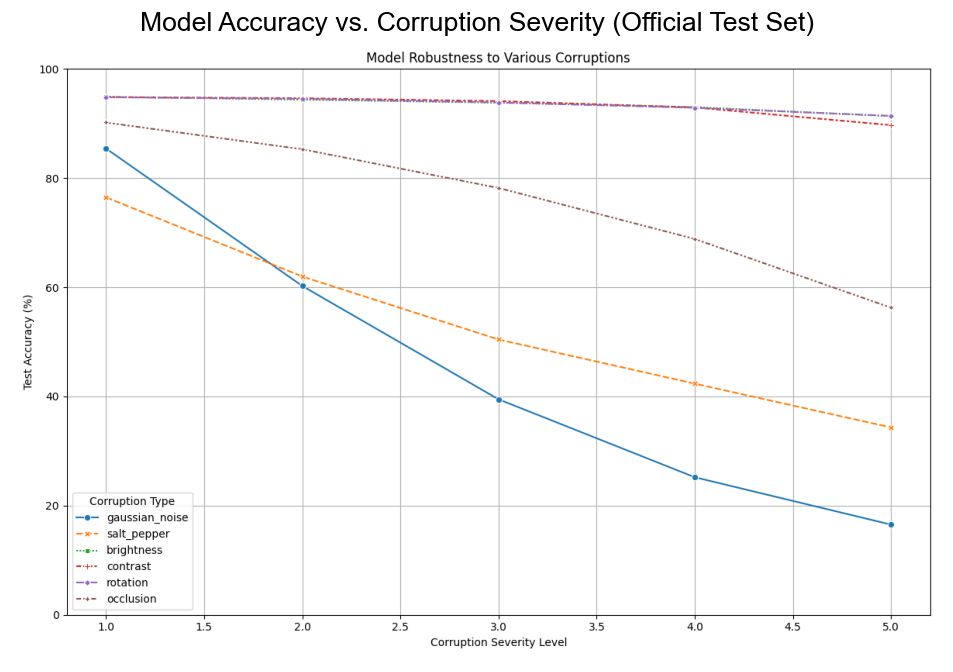

In [4]:
# --- Load Robustness Data ---
# Define the correct path to the official test results
ROBUSTNESS_RESULTS_PATH = os.path.join(OFFICIAL_TEST_DIR, 'robustness_results.json')

with open(ROBUSTNESS_RESULTS_PATH, 'r') as f:
    robustness_results = json.load(f)

# Convert the results to a pandas DataFrame
df_robustness = pd.DataFrame(robustness_results)
df_robustness.index = [f'Severity {i+1}' for i in df_robustness.index]
df_robustness.columns.name = "Corruption Type"

# Style the DataFrame for better readability
# Red background indicates lower accuracy (worse performance)
styled_robustness_df = df_robustness.style \
    .background_gradient(cmap='Reds_r', axis=None) \
    .format('{:.2f}%')

print(" --- Robustness Test Results (Official Test Set Accuracy %) --- ")
display(styled_robustness_df)


# --- Display the Robustness Plot ---
robustness_plot_path = os.path.join(OFFICIAL_TEST_DIR, 'robustness_curves.png')

plt.figure(figsize=(10, 7))
img = mpimg.imread(robustness_plot_path)
plt.imshow(img)
plt.axis('off')
plt.title('Model Accuracy vs. Corruption Severity (Official Test Set)', fontsize=16)
plt.show()

## 5. Confusion Matrix Analysis (Split Test Set)

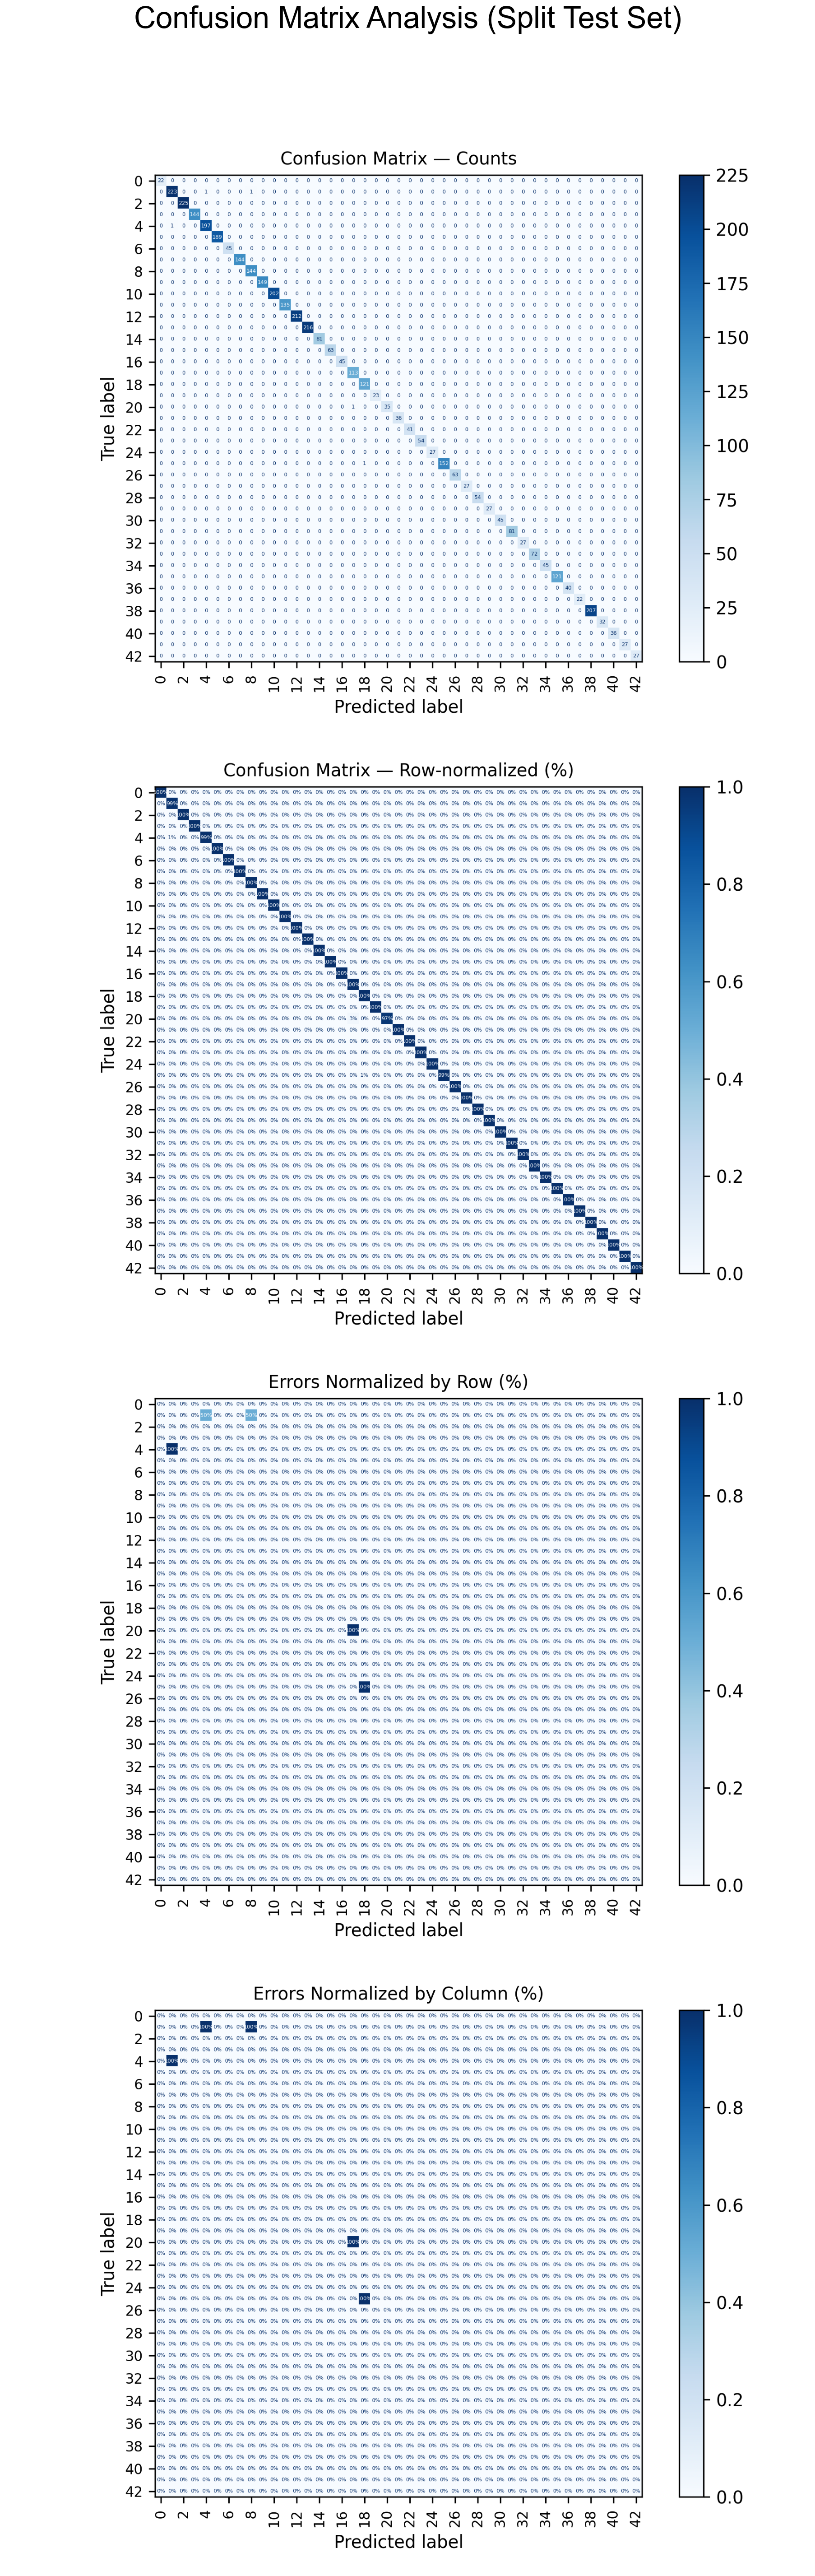

In [5]:
# Paths to the four confusion matrix plots
cm_paths = {
    "Absolute Counts": os.path.join(SPLIT_TEST_DIR, 'confusion_matrix_counts.png'),
    "CM Row Normalization": os.path.join(SPLIT_TEST_DIR, 'confusion_matrix_normalized.png'),
    "Errors Row Normalization": os.path.join(SPLIT_TEST_DIR, 'errors_normalized_row.png'),
    "Errors Column Normalization": os.path.join(SPLIT_TEST_DIR, 'errors_normalized_column.png')
}

# Create a 4x1 grid of plots
fig, axes = plt.subplots(4, 1, figsize=(30, 50))
fig.suptitle('Confusion Matrix Analysis (Split Test Set)', fontsize=40)

for ax, (title, path) in zip(axes.flatten(), cm_paths.items()):
    img = mpimg.imread(path)
    ax.imshow(img)
    # ax.set_title(title)
    ax.axis('off')

plt.tight_layout(rect=(0, 0.03, 1, 0.95))
plt.show()

## 6. Confusion Matrix Analysis (Official Test Set)

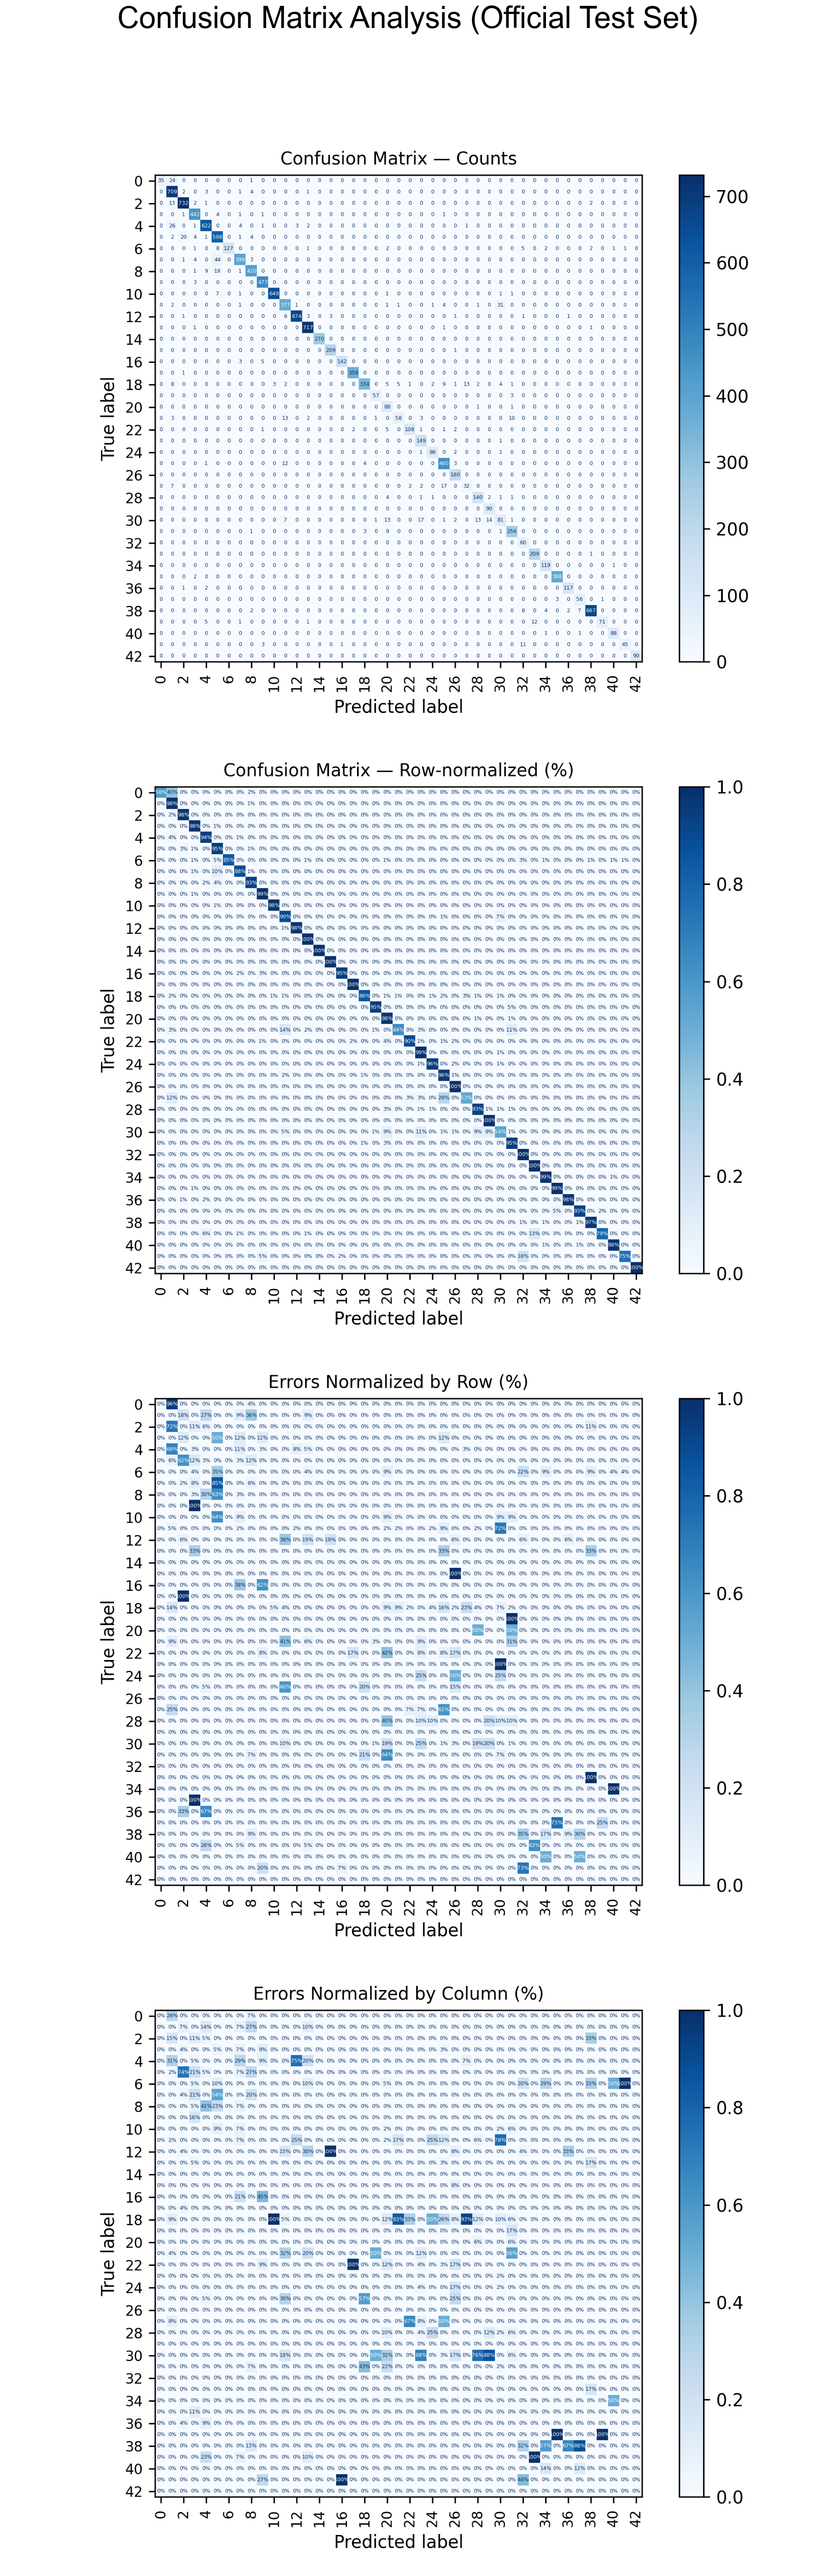

In [6]:
# Paths to the four confusion matrix plots
cm_paths = {
    "Absolute Counts": os.path.join(OFFICIAL_TEST_DIR, 'confusion_matrix_counts.png'),
    "CM Row Normalization": os.path.join(OFFICIAL_TEST_DIR, 'confusion_matrix_normalized.png'),
    "Errors Row Normalization": os.path.join(OFFICIAL_TEST_DIR, 'errors_normalized_row.png'),
    "Errors Column Normalization": os.path.join(OFFICIAL_TEST_DIR, 'errors_normalized_column.png')
}

# Create a 4x1 grid of plots
fig, axes = plt.subplots(4, 1, figsize=(30, 50))
fig.suptitle('Confusion Matrix Analysis (Official Test Set)', fontsize=40)

for ax, (title, path) in zip(axes.flatten(), cm_paths.items()):
    img = mpimg.imread(path)
    ax.imshow(img)
    # ax.set_title(title)
    ax.axis('off')

plt.tight_layout(rect=(0, 0.03, 1, 0.95))
plt.show()

## 7. Detailed Per-Class Performance (Official Test Set)

In [7]:
# Load the official classification report into a pandas DataFrame, excluding summary rows
df_report = pd.DataFrame(official_class_report).T.drop(['accuracy', 'macro avg', 'weighted avg'])

# Convert relevant columns to numeric for sorting and styling
for col in ['precision', 'recall', 'f1-score', 'support']:
    df_report[col] = pd.to_numeric(df_report[col])

# Style the DataFrame for better readability
styled_df = df_report.sort_values(by='f1-score', ascending=True).style \
    .background_gradient(cmap='Reds_r', subset=['f1-score']) \
    .format({'precision': '{:.2%}', 'recall': '{:.2%}', 'f1-score': '{:.3f}', 'support': '{:.0f}'})

print(" --- Per-Class Performance Metrics (Official Test Set) --- ")
print("Sorted by F1-Score to highlight challenging classes.")
display(styled_df)

 --- Per-Class Performance Metrics (Official Test Set) --- 
Sorted by F1-Score to highlight challenging classes.
